<a href="https://colab.research.google.com/github/vsw-812/DWM/blob/main/Assignment1_Digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

From sklearn.datasets load digits dataset and do following
1. Classify digits (0 to 9) using KNN classifier. You can use different
values for k neighbors and need to figure out a value of K that gives
you a maximum score. You can manually try different values of K or
use gridsearchcv
2. Plot confusion matrix
3. Plot classification report

Importing required Library

In [ ]:
from __future__ import print_function
from sklearn import datasets
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

import matplotlib.pyplot as plt
import cv2

In [ ]:
mnist= datasets.load_digits()

In [ ]:
(traindata,testdata,trainlabels,testlabels)=train_test_split(np.array(mnist.data),mnist.target,test_size=0.25,random_state=42)

#10% for validation

(traindata, valdata, trainlabels, vallabels) = train_test_split(traindata, trainlabels,
test_size=0.1, random_state=84)

In [ ]:
#sizes of each data split
print("training datapoint:{}".format(len(trainlabels)))
print("validation datapoints:{}".format(len(vallabels)))
print("test datapoints:{}".format(len(testlabels)))

training datapoint:1212
validation datapoints:135
test datapoints:450


In [ ]:
#initialze value of k for knn classification and accuracy for accuracy of k value
kvals=range(1,30,2)
accuracy=[]

for k in range(1,30,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(traindata,trainlabels)

  score=model.score(valdata,vallabels)
  print("k=%d,accuracy=%.2f%%"%(k,score*100))
  accuracy.append(score)


k=1,accuracy=99.26%
k=3,accuracy=99.26%
k=5,accuracy=99.26%
k=7,accuracy=99.26%
k=9,accuracy=99.26%
k=11,accuracy=99.26%
k=13,accuracy=99.26%
k=15,accuracy=99.26%
k=17,accuracy=98.52%
k=19,accuracy=98.52%
k=21,accuracy=97.78%
k=23,accuracy=97.04%
k=25,accuracy=97.78%
k=27,accuracy=97.04%
k=29,accuracy=97.04%


In [ ]:
#finding k value with most accuracy 
i=np.argmax(accuracy)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kvals[i],
accuracy[i] * 100))


k=1 achieved highest accuracy of 99.26% on validation data


In [ ]:

# re-training our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kvals[i])
model.fit(traindata, trainlabels)
predictions = model.predict(testdata)
print(predictions[1])

9


In [ ]:
#confusion matrix

print ("Confusion matrix")
print(confusion_matrix(testlabels,predictions))

Confusion matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


In [ ]:
# final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(testlabels, predictions))


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



 digit is : 0


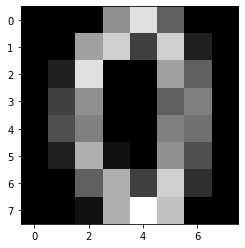

 digit is : 1


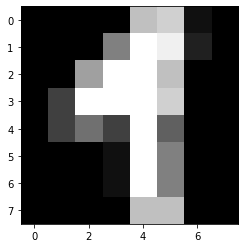

 digit is : 7


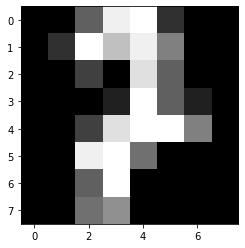

 digit is : 1


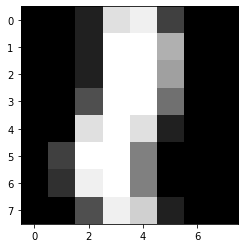

 digit is : 1


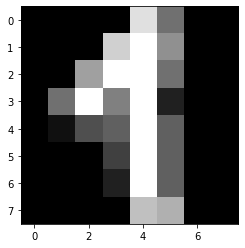

In [ ]:
for i in np.random.randint(0, high=len(testlabels), size=(5,)):
         # grab the image and classify it
         image = testdata[i]
         prediction = model.predict([image])[0]
         
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         print(" digit is : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         cv2.waitKey(0)